# DATA CLEANING AND EDA REATIL DATA BEFORE FORECASTING

In [123]:
#Import basic labraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
color = sns.color_palette()


In [124]:
#Read data
df = pd.read_excel("Online Retail.xlsx", engine='openpyxl')
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [125]:
df.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [127]:
#shape of the data set
df.shape
print(f'The shape of the dataset is: {df.shape}')

The shape of the dataset is: (541909, 8)


# Data Cleaning

In [128]:
#Check for missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

InvoiceNo - 0%
StockCode - 0%
Description - 0%
Quantity - 0%
InvoiceDate - 0%
UnitPrice - 0%
CustomerID - 25%
Country - 0%


25% of the column CustomerID has missing data, because it's crusual column for the analysis, we need to remove rows with missing data from the analysis.

In [129]:
#data points that have missing customer id
df[df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [130]:
#Drop NAs
df = df.dropna()

In [131]:
#Duplicates
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)

(5225, 8)


In [132]:
# Dropping the duplicates 
df.drop_duplicates(inplace=True)

In [133]:
#Drop irrelevant columns: description -> requred extra work with classification may be we will use it later
df = df.drop('Description', 1)

In [134]:
#We have a lot of Quantity that less than or equal zero (returns) that needs to be removed from the analysis
df = df[df.Quantity > 0]

In [135]:
#We have a lot of UnitPrices that less than or equal zero (returns) that needs to be removed from the analysis
df = df[df.UnitPrice >0]

In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392692.0,13.119702,180.492832,1.000,2.00,6.00,12.00,80995.00
UnitPrice,392692.0,3.125914,22.241836,0.001,1.25,1.95,3.75,8142.75
CustomerID,392692.0,15287.843865,1713.539549,12346.000,13955.00,15150.00,16791.00,18287.00


# EDA

<AxesSubplot:>

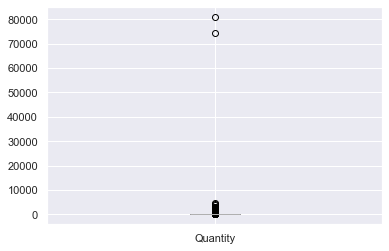

In [137]:
# histogram of Quantity.
df.boxplot(column=['Quantity'])

In [138]:
df['Quantity'].describe()

count    392692.000000
mean         13.119702
std         180.492832
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

<AxesSubplot:>

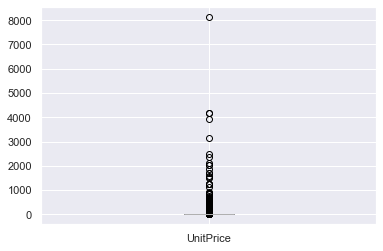

In [144]:
#histogram of UnitPrice
df.boxplot(column=['UnitPrice'])

In [147]:
print(df['UnitPrice'].describe())

count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64


Boxplots detected some outliers in Quantity and Unit Price columns, however, it would be interesting to research Customer lifetime value for customers with such extrime purchases. We dont need to remove outliers in this case.

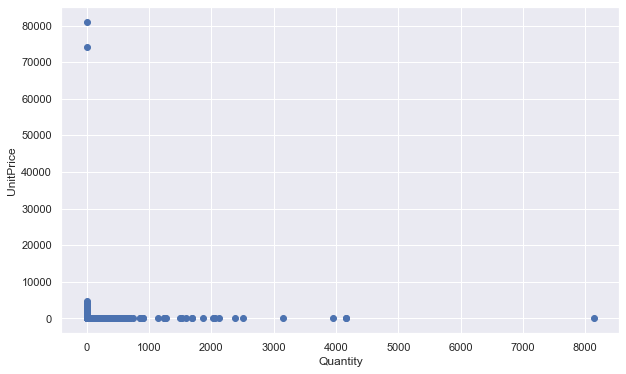

In [148]:
# Plotting a scatter plot Quantity and Unit Price relationship
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['UnitPrice'], df['Quantity'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

In [149]:
# rearrange all the columns for easy reference
df = df[['InvoiceDate','CustomerID','InvoiceNo','Quantity','UnitPrice','Country']]

In [150]:
df.head()

,InvoiceDate,CustomerID,InvoiceNo,Quantity,UnitPrice,Country
0,2010-12-01 08:26:00,17850.0,536365,6,2.55,United Kingdom
1,2010-12-01 08:26:00,17850.0,536365,6,3.39,United Kingdom
2,2010-12-01 08:26:00,17850.0,536365,8,2.75,United Kingdom
3,2010-12-01 08:26:00,17850.0,536365,6,3.39,United Kingdom
4,2010-12-01 08:26:00,17850.0,536365,6,3.39,United Kingdom


In [151]:
#Create new variable -> Revenue per invoice
df['Revenue'] = df['Quantity']*df['UnitPrice']

In [152]:
#count the number of rows 
df.count() 

InvoiceDate    392692
CustomerID     392692
InvoiceNo      392692
Quantity       392692
UnitPrice      392692
Country        392692
Revenue        392692
dtype: int64

,CustomerID,Quantity,UnitPrice,Revenue
CustomerID,1.000000,-0.006029,-0.010800,-0.003897
Quantity,-0.006029,1.000000,-0.004578,0.914451
UnitPrice,-0.010800,-0.004578,1.000000,0.081619
Revenue,-0.003897,0.914451,0.081619,1.000000


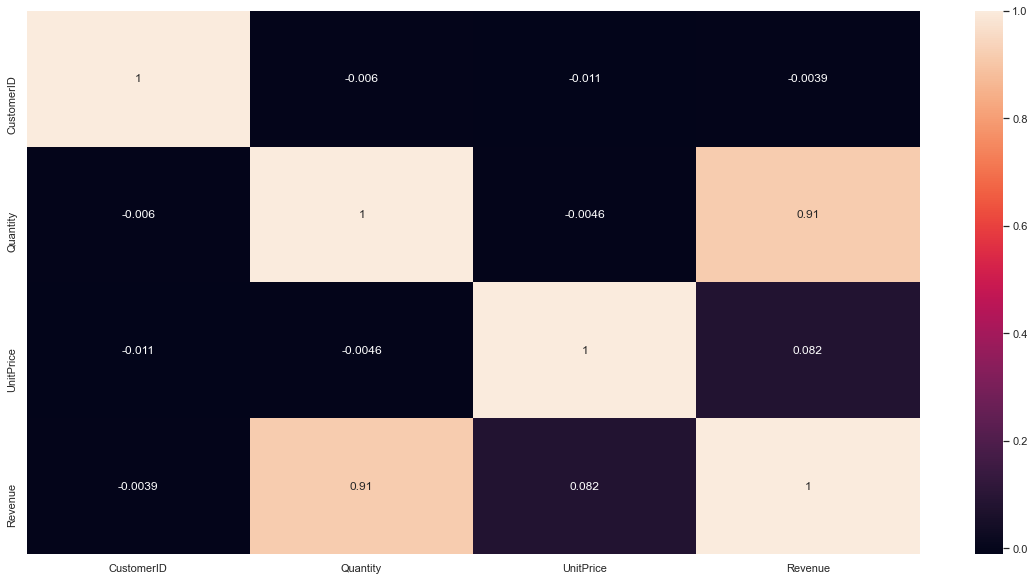

In [153]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,annot=True)
c

In [154]:
#Timestemp check
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [155]:
#Set Invoice date as an index for time series analysis
df_index = df.set_index('InvoiceDate')

In [156]:
####?????not sure how to resample data based on Customer ID information
df_daily = df_index.resample('D').sum()

In [110]:
#What countries made the most purchases
df['Country'].value_counts()

United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Most of the customers who made a purchase are from UK -> 490300.

In [157]:
#How many orders made by the customers?
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

In [159]:
#Top 5 with number of orders
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
1,12347.0,Iceland,182
3,12349.0,Italy,73
2,12348.0,Finland,31
4,12350.0,Norway,17
0,12346.0,United Kingdom,1


The most frequent customer is from Iceland. This customer ID made 192 purchases. 

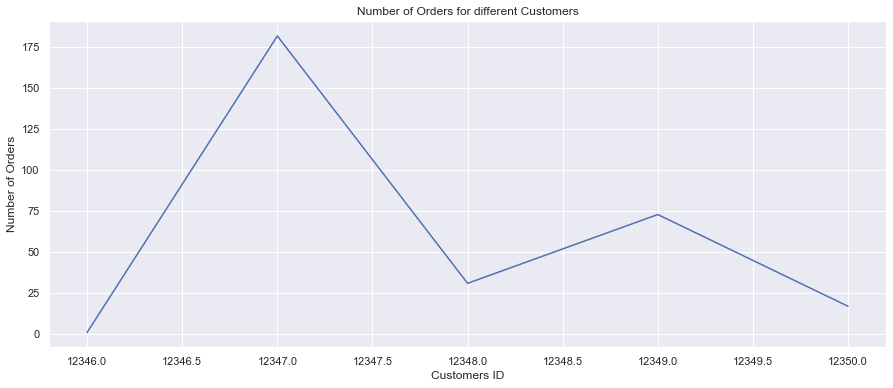

In [160]:
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

Now, we are ready for forecusting analysis.